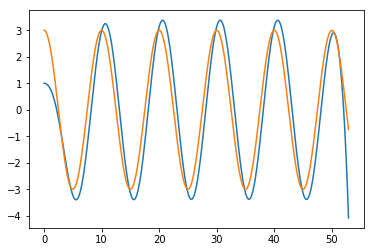

In [43]:
import numpy as np
import time
import matplotlib.pyplot as plt

from ballbeam import PID, BallBeam

%matplotlib inline

def plot_curve(a, b, r, theta, kp, ki, kd):

    pid = PID(kp, ki, kd, time_units = 0.02)
    bb = BallBeam(r = r, theta = theta, a = a, b = b, time_units = 0.02)

    x = []
    y1 = []
    y2 = []

    while True:
        pid.set_point = bb.yd()
        bb.feed(pid.output)
        pid.compute(bb.output)
    
        x.append(bb.total_time)
        y1.append(bb.output)
        y2.append(bb.yd())
    
        if abs(bb.output) > 4 or bb.total_time > 300:
            break
    
    x = np.array(x)
    y1 = np.array(y1)
    y2 = np.array(y2)

    plt.plot(x, y1)
    plt.plot(x, y2)
    plt.show()

plot_curve(3, 0.6, 1, 0.0564, 0.03344067436841209, 0.0, 0.10657362092129136)

In [44]:
with open('result.csv', 'r') as f:
    lines = f.readlines()[1:]

[1.0, 0.6, 1.0, 0.0564, 0.9339800459353429, 0.0239988639056218, 0.0]


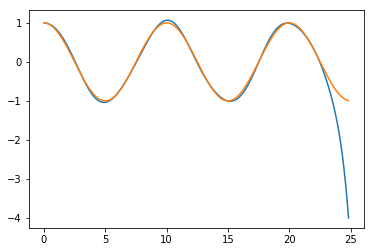

[1.0, 0.6, 2.0, 0.1129, 0.07688754213343359, 0.0, 0.19283169244135753]


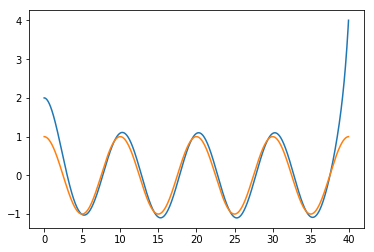

[1.0, 0.6, 3.0, 0.1698, 0.06984462976520961, 0.0, 0.15930768922547242]


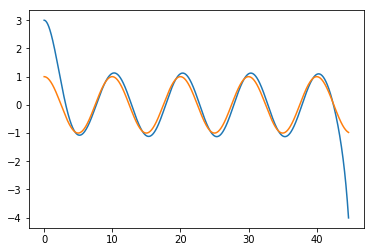

In [45]:
for line in lines[:3]:
        params = [float(token) for token in line.rstrip('\n').split(',')]
        print(params)

        plot_curve(*params)

[2.0, 0.6, 1.0, 0.0564, 0.0, 0.038447033416534916, 0.15908294399242046]


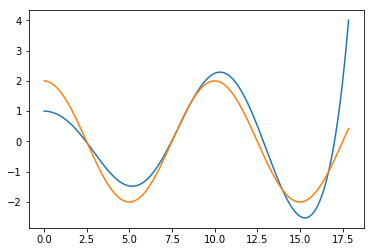

[2.0, 0.6, 2.0, 0.1129, 0.2666471547291202, 0.3638556498821898, 0.28875528265056016]


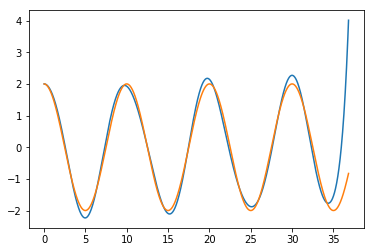

[2.0, 0.6, 3.0, 0.1698, 0.07247532254006629, 0.0, 0.11439360730751248]


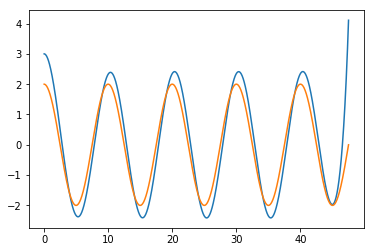

In [46]:
for line in lines[3:6]:
        params = [float(token) for token in line.rstrip('\n').split(',')]
        print(params)

        plot_curve(*params)

[3.0, 0.6, 1.0, 0.0564, 0.03344067436841209, 0.0, 0.10657362092129136]


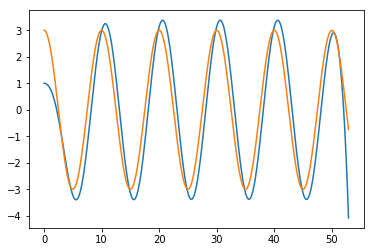

[3.0, 0.6, 2.0, 0.1129, 0.031931569774353366, 0.030275996162116015, 0.26104273217290846]


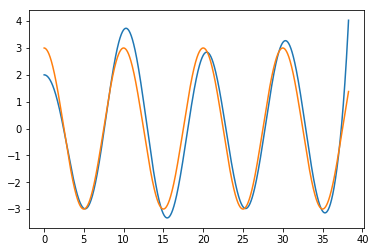

[3.0, 0.6, 3.0, 0.1698, 0.17762212334883826, 0.0, 0.5097242791543676]


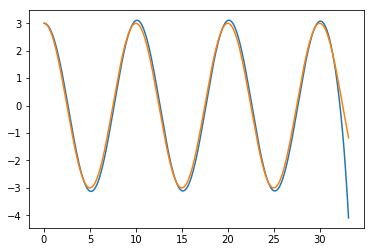

In [47]:
for line in lines[6:]:
        params = [float(token) for token in line.rstrip('\n').split(',')]
        print(params)

        plot_curve(*params)